# Compare inputs

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import glob
import numpy as np
import dask.array as da

In [2]:
globalclimdir='/work/hpc/datasets/un_fao/pyaez/global_daily/8100/'
globalstaticdir='/work/hpc/datasets/un_fao/pyaez/global_static/'
chinadir='/work/hpc/datasets/un_fao/pyaez/china_test/'  # this is 8110 I think, or 1980?

# for china window
ilat1,ilat2=500,850
ilon1,ilon2=3050,3750

### Static variables

#### mask

In [3]:
gfile=glob.glob(globalstaticdir+'mask_*.tif')[0]
cfile=glob.glob(chinadir+'mask.tif')[0]
gfile,cfile

gdata=xr.open_dataset(gfile,engine='rasterio').squeeze().isel(y=slice(ilat1,ilat2),x=slice(ilon1,ilon2))
cdata=xr.open_dataset(cfile,engine='rasterio').squeeze()

minval=min(np.nanmin(gdata.band_data),np.nanmin(cdata.band_data))
maxval=max(np.nanmax(gdata.band_data),np.nanmax(cdata.band_data))
minval,maxval

(0.0, 1.0)

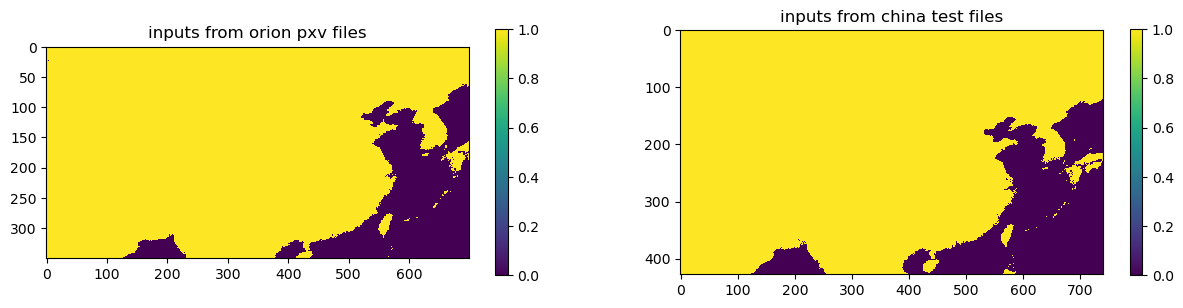

In [4]:
plt.figure(figsize=(15,8))

# plot from gaez global file
plt.subplot(1, 2, 1)
plt.imshow(gdata.band_data,vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from orion pxv files')
plt.colorbar(shrink=0.4)

# plot from china test file
plt.subplot(1, 2, 2)
plt.imshow(cdata.band_data,vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from china test files')
plt.colorbar(shrink=0.4)

#### elev

In [5]:
gfile=glob.glob(globalstaticdir+'elev_*.tif')[0]
cfile=glob.glob(chinadir+'elev.tif')[0]
gfile,cfile

gdata=xr.open_dataset(gfile,engine='rasterio').squeeze().isel(y=slice(ilat1,ilat2),x=slice(ilon1,ilon2))
cdata=xr.open_dataset(cfile,engine='rasterio').squeeze()

minval=min(np.nanmin(gdata.band_data),np.nanmin(cdata.band_data))
maxval=max(np.nanmax(gdata.band_data),np.nanmax(cdata.band_data))
minval,maxval

(-153.0, 6563.0)

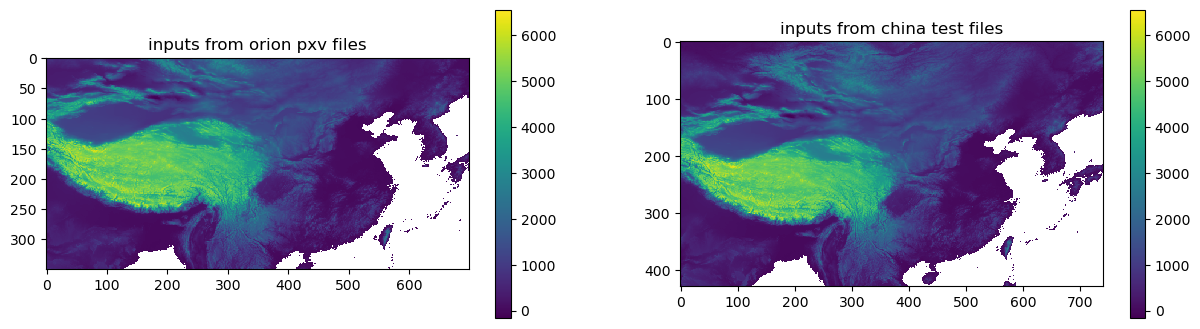

In [6]:
# plot gaez results global
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(gdata.band_data,vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from orion pxv files')
plt.colorbar(shrink=0.4)

plt.subplot(1, 2, 2)
plt.imshow(cdata.band_data,vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from china test files')
plt.colorbar(shrink=0.4)

#### soil_terrain_lulc

In [7]:
gfile=glob.glob(globalstaticdir+'soil_terrain_lulc*.tif')[0]
cfile=glob.glob(chinadir+'soil_terrain_lulc*.tif')[0]
gfile,cfile

gdata=xr.open_dataset(gfile,engine='rasterio').squeeze().isel(y=slice(ilat1,ilat2),x=slice(ilon1,ilon2))
cdata=xr.open_dataset(cfile,engine='rasterio').squeeze()

minval=min(np.nanmin(gdata.band_data),np.nanmin(cdata.band_data))
maxval=max(np.nanmax(gdata.band_data),np.nanmax(cdata.band_data))
minval,maxval

(1.0, 8.0)

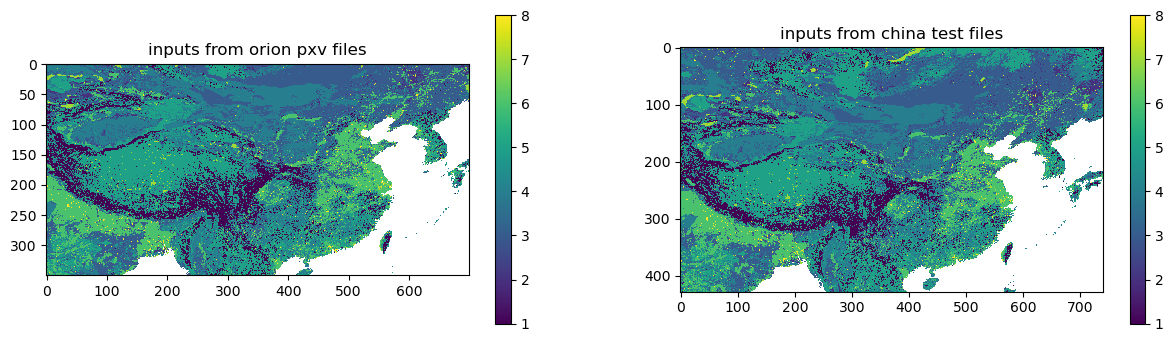

In [8]:
# plot gaez results global
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(gdata.band_data,vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from orion pxv files')
plt.colorbar(shrink=0.4)

plt.subplot(1, 2, 2)
plt.imshow(cdata.band_data,vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from china test files')
plt.colorbar(shrink=0.4)

### Climate variables
#### Tmax

In [9]:
gfile=glob.glob(globalclimdir+'Tmax-2m365/')[0]
cfile=glob.glob(chinadir+'Tmax-2m365/')[0]
print(gfile,cfile)

gdata=da.from_npy_stack(gfile).astype('float32')[ilat1:ilat2,ilon1:ilon2]
cdata=da.from_npy_stack(cfile).astype('float32')

mins=[da.nanmin(gdata).compute(),da.nanmin(cdata).compute()]
maxs=[da.nanmax(gdata).compute(),da.nanmax(cdata).compute()]
minval=min(mins)
maxval=max(maxs)
print(mins[0],maxs[0])
print(mins[1],maxs[1])
minval,maxval

/work/hpc/datasets/un_fao/pyaez/global_daily/8100/Tmax-2m365/ /work/hpc/datasets/un_fao/pyaez/china_test/Tmax-2m365/
-28.244701 43.765
-32.559998 44.885


(-32.559998, 44.885)

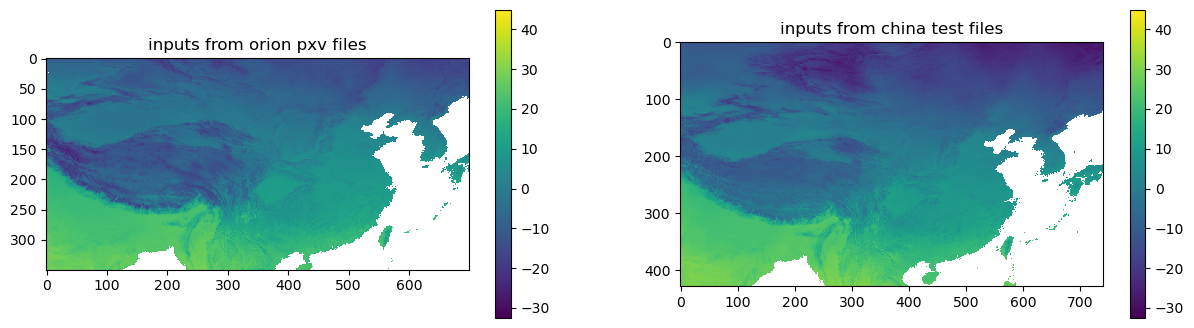

In [10]:
# plot gaez results global
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(gdata[:,:,0],vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from orion pxv files')
plt.colorbar(shrink=0.4)

plt.subplot(1, 2, 2)
plt.imshow(cdata[:,:,0],vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from china test files')
plt.colorbar(shrink=0.4)

#### Tmin

In [11]:
gfile=glob.glob(globalclimdir+'Tmin-2m365/')[0]
cfile=glob.glob(chinadir+'Tmin-2m365/')[0]
print(gfile,cfile)

gdata=da.from_npy_stack(gfile).astype('float32')[ilat1:ilat2,ilon1:ilon2]
cdata=da.from_npy_stack(cfile).astype('float32')

mins=[da.nanmin(gdata).compute(),da.nanmin(cdata).compute()]
maxs=[da.nanmax(gdata).compute(),da.nanmax(cdata).compute()]
minval=min(mins)
maxval=max(maxs)
print(mins[0],maxs[0])
print(mins[1],maxs[1])
minval,maxval

/work/hpc/datasets/un_fao/pyaez/global_daily/8100/Tmin-2m365/ /work/hpc/datasets/un_fao/pyaez/china_test/Tmin-2m365/
-35.193203 31.6965
-44.545 30.1


(-44.545, 31.6965)

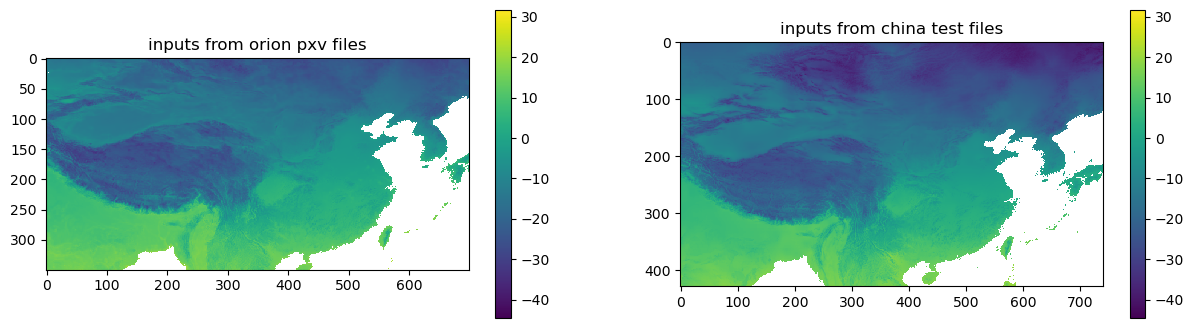

In [12]:
# plot gaez results global
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(gdata[:,:,0],vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from orion pxv files')
plt.colorbar(shrink=0.4)

plt.subplot(1, 2, 2)
plt.imshow(cdata[:,:,0],vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from china test files')
plt.colorbar(shrink=0.4)

#### Rhum

In [13]:
gfile=glob.glob(globalclimdir+'Rhum365/')[0]
cfile=glob.glob(chinadir+'Rhum365/')[0]
print(gfile,cfile)

gdata=da.from_npy_stack(gfile).astype('float32')[ilat1:ilat2,ilon1:ilon2]
cdata=da.from_npy_stack(cfile).astype('float32')

mins=[da.nanmin(gdata).compute(),da.nanmin(cdata).compute()]
maxs=[da.nanmax(gdata).compute(),da.nanmax(cdata).compute()]
minval=min(mins)
maxval=max(maxs)
print(mins[0],maxs[0])
print(mins[1],maxs[1])
minval,maxval

/work/hpc/datasets/un_fao/pyaez/global_daily/8100/Rhum365/ /work/hpc/datasets/un_fao/pyaez/china_test/Rhum365/
0.019196946 1.0744214
0.24999993 0.9418376


(0.019196946, 1.0744214)

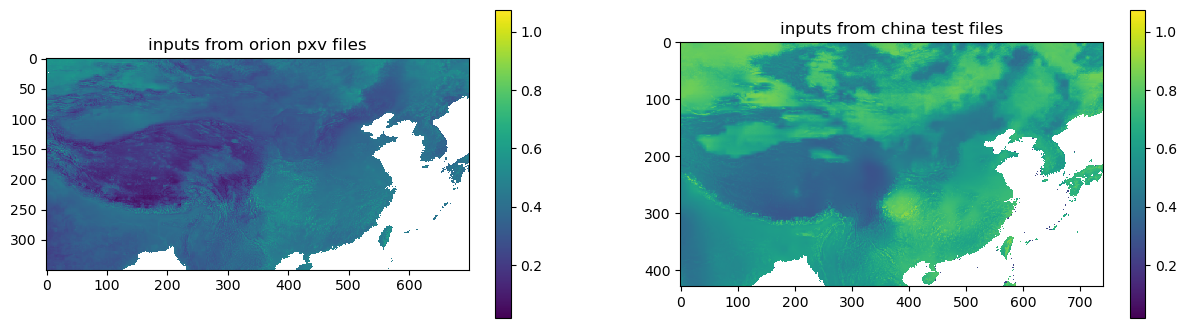

In [14]:
# plot gaez results global
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(gdata[:,:,0],vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from orion pxv files')
plt.colorbar(shrink=0.4)

plt.subplot(1, 2, 2)
plt.imshow(cdata[:,:,0],vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from china test files')
plt.colorbar(shrink=0.4)

#### Precip

In [15]:
gfile=glob.glob(globalclimdir+'Precip365/')[0]
cfile=glob.glob(chinadir+'Precip365/')[0]
print(gfile,cfile)

gdata=da.from_npy_stack(gfile).astype('float32')[ilat1:ilat2,ilon1:ilon2]
cdata=da.from_npy_stack(cfile).astype('float32')

mins=[da.nanmin(gdata).compute(),da.nanmin(cdata).compute()]
maxs=[da.nanmax(gdata).compute(),da.nanmax(cdata).compute()]
minval=min(mins)
maxval=max(maxs)
print(mins[0],maxs[0])
print(mins[1],maxs[1])
minval,maxval

/work/hpc/datasets/un_fao/pyaez/global_daily/8100/Precip365/ /work/hpc/datasets/un_fao/pyaez/china_test/Precip365/
0.0 78.86517
0.0 83.130844


(0.0, 83.130844)

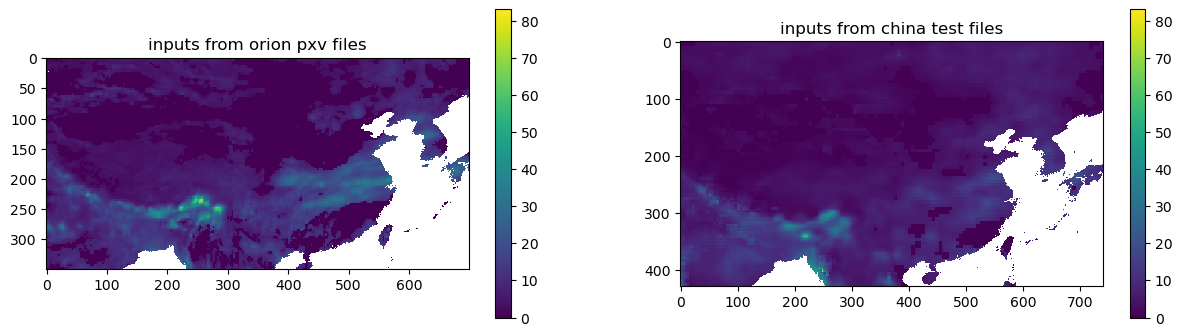

In [16]:
# plot gaez results global
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(gdata[:,:,180],vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from orion pxv files')
plt.colorbar(shrink=0.4)

plt.subplot(1, 2, 2)
plt.imshow(cdata[:,:,180],vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from china test files')
plt.colorbar(shrink=0.4)

In [17]:
# look at global max for units check
gdata=da.from_npy_stack(gfile).astype('float32')
minval=da.nanmin(gdata).compute()
maxval=da.nanmax(gdata).compute()
minval,maxval

(0.0, 213.72096)

#### Srad

In [18]:
gfile=glob.glob(globalclimdir+'Srad365/')[0]
cfile=glob.glob(chinadir+'Srad365/')[0]
print(gfile,cfile)

gdata=da.from_npy_stack(gfile).astype('float32')[ilat1:ilat2,ilon1:ilon2]
cdata=da.from_npy_stack(cfile).astype('float32')

minval=min(da.nanmin(gdata),da.nanmin(cdata))
maxval=min(da.nanmax(gdata),da.nanmax(cdata))
minval.compute(),maxval.compute()

/work/hpc/datasets/un_fao/pyaez/global_daily/8100/Srad365/ /work/hpc/datasets/un_fao/pyaez/china_test/Srad365/


(0.0, 319.5935422047967)

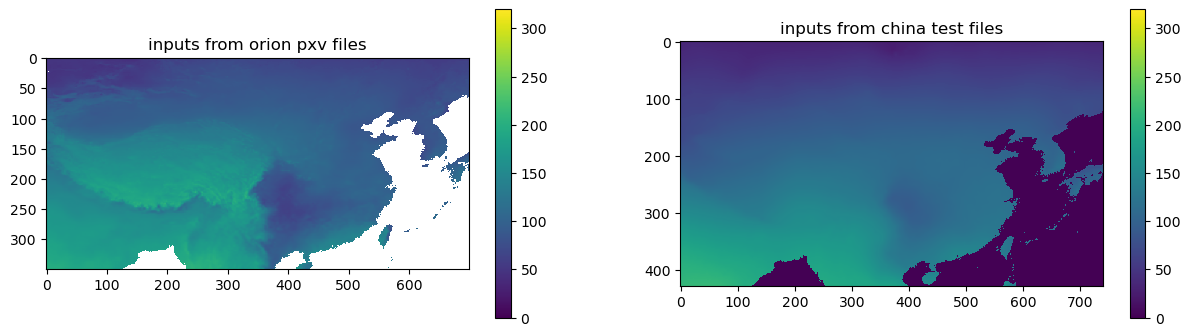

In [19]:
# plot gaez results global
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(gdata[:,:,0],vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from orion pxv files')
plt.colorbar(shrink=0.4)

plt.subplot(1, 2, 2)
plt.imshow(cdata[:,:,0],vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from china test files')
plt.colorbar(shrink=0.4)

#### Wind

In [20]:
gfile=glob.glob(globalclimdir+'Wind-2m365/')[0]
cfile=glob.glob(chinadir+'Wind-2m365/')[0]
print(gfile,cfile)

gdata=da.from_npy_stack(gfile).astype('float32')[ilat1:ilat2,ilon1:ilon2]
cdata=da.from_npy_stack(cfile).astype('float32')

minval=min(da.nanmin(gdata),da.nanmin(cdata))
maxval=min(da.nanmax(gdata),da.nanmax(cdata))
minval.compute(),maxval.compute()

/work/hpc/datasets/un_fao/pyaez/global_daily/8100/Wind-2m365/ /work/hpc/datasets/un_fao/pyaez/china_test/Wind-2m365/


(0.19835664, 5.3011456)

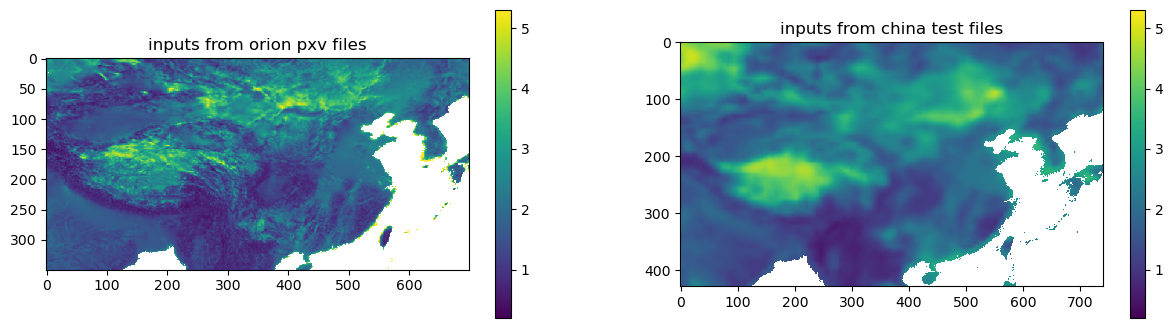

In [21]:
# plot gaez results global
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(gdata[:,:,0],vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from orion pxv files')
plt.colorbar(shrink=0.4)

plt.subplot(1, 2, 2)
plt.imshow(cdata[:,:,0],vmin=minval,vmax=maxval,interpolation='none')
plt.title('inputs from china test files')
plt.colorbar(shrink=0.4)